In [ ]:
!pip install clean-text
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from cleantext import clean
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=0e9dff54ca1e78fc4e550fbad6297efaee7bd77c294aed6a6fa284f8edc80a30
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
from os import path
from google.colab import files
if not path.exists('./twitter_MBTI.csv'):
  files.upload()  # Upload your kaggle.json here

  !pip install -q kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 /root/.kaggle/kaggle.json

  !kaggle datasets download -d mazlumi/mbti-personality-type-twitter-dataset
  !unzip -q mbti-personality-type-twitter-dataset.zip
  !rm mbti-personality-type-twitter-dataset.zip

data = pd.read_csv('./twitter_MBTI.csv') 

ERROR: Operation cancelled by user
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open mbti-personality-type-twitter-dataset.zip, mbti-personality-type-twitter-dataset.zip.zip or mbti-personality-type-twitter-dataset.zip.ZIP.
rm: cannot remove 'mbti-personality-type-twitter-dataset.zip': No such file or directory


FileNotFoundError: ignored

In [ ]:
!pip install googletrans==3.1.0a0
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=17e2d8f3d5be3d8381125c8e870bf95deb71a1d75dc7f10de758cf14751e2ec3
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


###Data Cleaning

In [ ]:
#splitting |||
def text_split(x):
  return x.split('|||')
data_split = data.assign(splitted = data.get('text').apply(text_split))
data_split

,Unnamed: 0,text,label,splitted
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,[@Pericles216 @HierBeforeTheAC @Sachinettiyil ...
1,1,@Hispanthicckk Being you makes you look cute||...,intj,"[@Hispanthicckk Being you makes you look cute,..."
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj,[@Alshymi Les balles sont réelles et sont tiré...
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"[I'm like entp but idiotic, Hey boy, do you wa..."
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,[@kaeshurr1 Give it to @ZargarShanif ... He ha...
...,...,...,...,...
7806,7806,"@sobsjjun God,,pls take care 😕|||@sobsjjun Hir...",intp,"[@sobsjjun God,,pls take care 😕, @sobsjjun Hir..."
7807,7807,@Ignis_02 wow last time i got intp https://t.c...,intp,[@Ignis_02 wow last time i got intp https://t....
7808,7808,@akupilled A 100%|||@akupilled That SOMEONE wi...,entp,"[@akupilled A 100%, @akupilled That SOMEONE wi..."
7809,7809,If you’re #INTJ this one is for you | What is ...,infj,[If you’re #INTJ this one is for you | What is...


In [ ]:
#findng word count of each tweet
def word_count(user):
  counts = np.array([])
  for tweet in range(len(user)):
      counts = np.append(counts, len(user[tweet].split(' ')))
  return counts

word_count_per_user = data_split.get('splitted').apply(word_count)
total_word_count = np.concatenate(word_count_per_user.values)

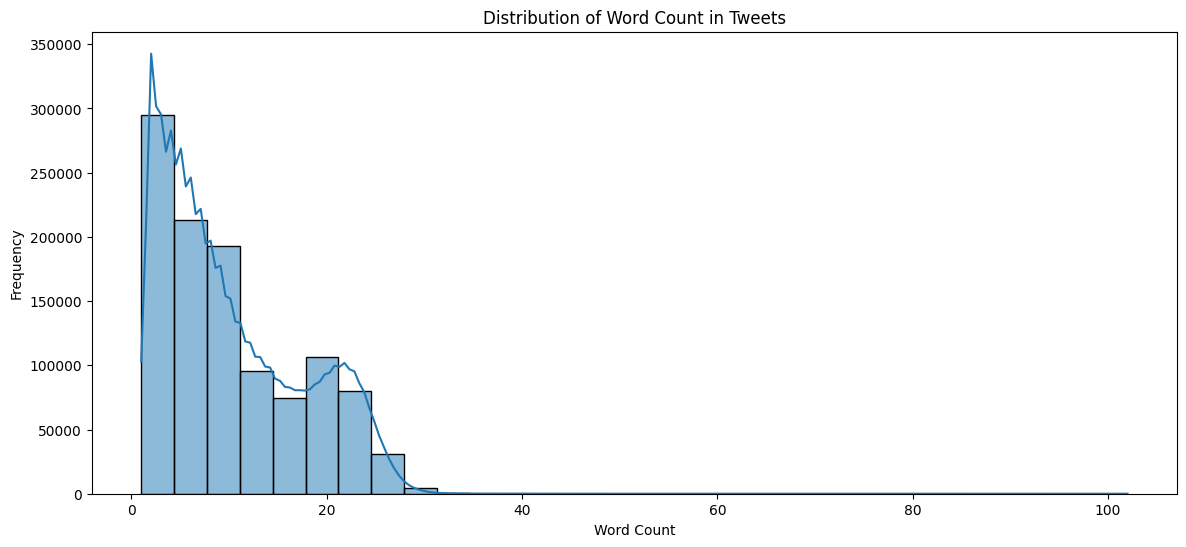

In [ ]:
#word count distriution plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.histplot(data=total_word_count, bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#cleaning function
data = pd.read_csv('/content/twitter_MBTI.csv')

# data = data[data['text'].apply(detect_translate_lang)=='en']

def cleanup_text(texts):
  # removing emoji using cleantext.clean lib. 
  #Note: I think it also cleaned extra white spaces and upperCase. Need double check
  text = clean(texts, no_emoji=True) # Inefficient
  # remove @, #, web URL, newLine characters, special characters
  text = re.sub(r'(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|(http\S+)|(www.\S+)|(\n)|([^\w\s])','', text)
  return text

#data_cleaned = data.get('text').apply(cleanup_text)
#data_cleaned

In [ ]:
#translator function
def detect_translate_lang(text):
  translator = Translator()
  lang = translator.detect(text[:500]).lang
  return lang

In [ ]:
#adding the tweet's language
data_with_lang = data.assign(lang=data.get("text").apply(detect_translate_lang))
data_with_lang.head()

,Unnamed: 0,text,label,lang
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,en
1,1,@Hispanthicckk Being you makes you look cute||...,intj,en
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj,fr
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,en
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,kri


In [ ]:
#keeping only english tweets
data_cleaned_lang = data_with_lang[data_with_lang.get('lang')=='en']

In [ ]:
#clean up dataset with the languages
data_cleaned_lang = data_cleaned_lang.assign(cleaned_text = data_cleaned_lang.get('text').apply(cleanup_text))

In [ ]:
#splitting |||
def text_split(x):
  return x.split('   ')
data_split = data_cleaned_lang.assign(splitted = data_cleaned_lang.get('cleaned_text').apply(text_split))
data_split

,Unnamed: 0,text,label,lang,cleaned_text,splitted
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,en,the pope is infallible this is a catholic d...,"[, the pope is infallible this is a catholic d..."
1,1,@Hispanthicckk Being you makes you look cute||...,intj,en,being you makes you look cute on because then...,[ being you makes you look cute on because the...
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,en,im like entp but idiotichey boy do you want to...,[im like entp but idiotichey boy do you want t...
5,5,Frances Farmer Will Have Her Revenge On Seattl...,intj,en,frances farmer will have her revenge on seattl...,[frances farmer will have her revenge on seatt...
6,6,🤣🤭🤣🤭🤣🤭🤣🤭 https://t.co/2a0tICP1yk|||Blind faith...,intj,en,faith and the fact that humanity continues to...,[ faith and the fact that humanity continues t...
...,...,...,...,...,...,...
7806,7806,"@sobsjjun God,,pls take care 😕|||@sobsjjun Hir...",intp,en,godpls take care hiro emergency room are you...,[ godpls take care hiro emergency room are yo...
7807,7807,@Ignis_02 wow last time i got intp https://t.c...,intp,en,wow last time i got intp i think u upset t...,"[ wow last time i got intp, i think u upset t..."
7808,7808,@akupilled A 100%|||@akupilled That SOMEONE wi...,entp,en,a 100 that someone will get his ass kicked so...,[ a 100 that someone will get his ass kicked s...
7809,7809,If you’re #INTJ this one is for you | What is ...,infj,en,if youre this one is for you what is never f...,[if youre this one is for you what is never ...


In [ ]:
#finding word count of each tweet
def word_count(user):
  counts = np.array([])
  for tweet in range(len(user)):
    if len(user[tweet]) == 0:
          continue
    total = 0
    word = user[tweet].split(' ')
    for i in word:
      if i != '':
        total += 1
    counts = np.append(counts, total)
  return counts

word_count_per_user = data_split.assign(word_count = data_split.get('splitted').apply(word_count)).get('word_count')
total_word_count = np.concatenate(word_count_per_user.values)

In [ ]:
word_count_per_user.iloc[-1]

array([ 20.,   1.,  26.,   4.,  10.,  67.,  42.,  27.,  36.,  10.,  83.,
         4.,   1.,   7.,  13.,  18.,  19.,   1., 135., 129.,  86., 197.])

In [ ]:
data_split.get('cleaned_text').iloc[-1]

'  hey can you dm me a pic of what harry is wearing chicago on october 13th n4 thank you xxxxxxxx         angel   i didnt even think of kendall like that help kumalala is on there it took me a whileend of thread kumalalakumalalakumalasavestathis one deserves its own  2      2  songsalbums and artists    traitspersonality  shows 2  shows  characters 3  characters 2  characters  community   me based off of things that represent my personality type istp  this made me feel warm and fuzzy i love you morei stole this from page do it  blender take my hand thats so awesome oh same thing as in the same as me or same thing as in it didnt change meow meow literally i didbio change  he said the thing stop this right nowgeorgenotfound everybody     finish your sentencestill laughing at this btw  no way me too happy birthday karll but shes going to petsmart to get a haircut soon  every single animal  molly  yes she smells so good  naturally smell so good my cat smells like cologne   shell be unstopp

In [ ]:
data_split.get('splitted').iloc[-1][-1]#[0].split(' ')

'you should do an irl stream around nc ill be there  okok im going throigh them all rn and delteing blurry onethwyre so good too i love you karli took over 200 screenshots say bye bye to my storagei miss karl jacobsi want the purple twitch sweatshirtaustin is so funny for no reasoni am on the floor  this me do you want to live on a house boat with me in amsterdam plscrying over austin playing bohemian rhapsody on the piano and george singing while karl takes thumbnail pics  lolim crying this so happy and smileyaustingeorge and karl are the most plbeautoful people ever this is such a beautiful stream i love the lighting i love the  it was a long time ago but yes well now i want to go back to amsterdam im so sorry this is such a nice streamgenuinely smiling so hard rn new comfort streamthe lighting is beuatifulkarl jacobskarl in purple i loved the whole mcytgeoguesser fandom collision  ill be thinking real hardi am at olive garden and my sister ordered the 5cheese something and i without

In [ ]:
total_word_count.max()

3514.0

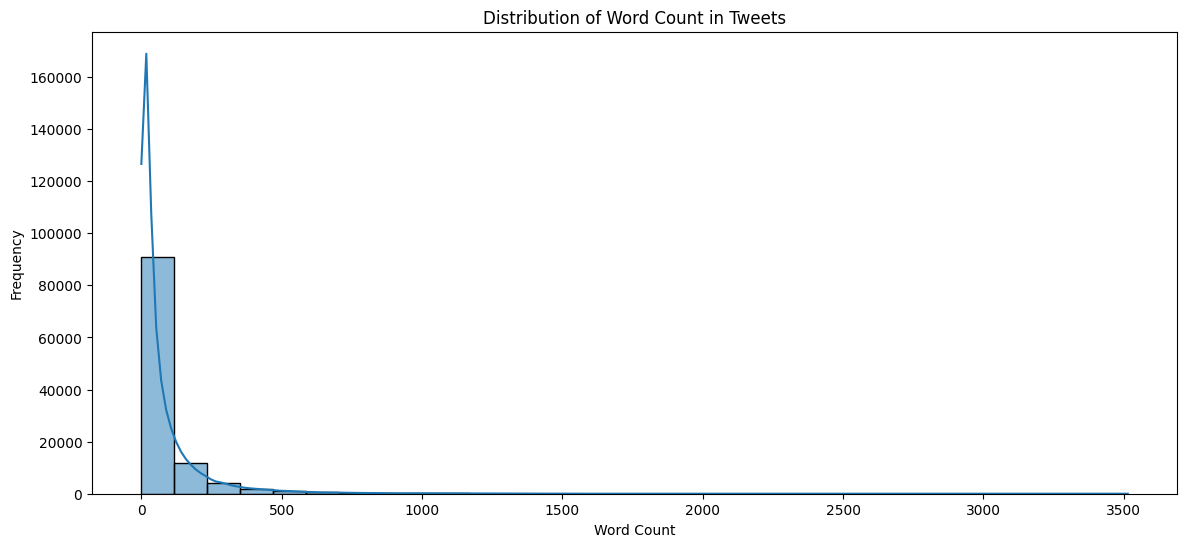

In [ ]:
#word count distriution plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.histplot(data=total_word_count, bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#replace spaces
def replace_spaces(text):
  return text.replace('   ', '')

data_cleaned_lang = data_cleaned_lang.assign(cleaned_text = data_cleaned_lang.get('cleaned_text').apply(replace_spaces))
data_cleaned_lang

,Unnamed: 0,text,label,lang,cleaned_text
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,en,the pope is infallible this is a catholic dogm...
1,1,@Hispanthicckk Being you makes you look cute||...,intj,en,being you makes you look cute on because then...
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,en,im like entp but idiotichey boy do you want to...
5,5,Frances Farmer Will Have Her Revenge On Seattl...,intj,en,frances farmer will have her revenge on seattl...
6,6,🤣🤭🤣🤭🤣🤭🤣🤭 https://t.co/2a0tICP1yk|||Blind faith...,intj,en,faith and the fact that humanity continues to...
...,...,...,...,...,...
7806,7806,"@sobsjjun God,,pls take care 😕|||@sobsjjun Hir...",intp,en,godpls take care hiro emergency room are you...
7807,7807,@Ignis_02 wow last time i got intp https://t.c...,intp,en,wow last time i got intp i think u upset the ...
7808,7808,@akupilled A 100%|||@akupilled That SOMEONE wi...,entp,en,a 100 that someone will get his ass kicked so...
7809,7809,If you’re #INTJ this one is for you | What is ...,infj,en,if youre this one is for you what is never f...


In [ ]:
#findng word count of each tweet
def word_count(text):
  counts = np.array([])
  for tweet in range(len(user)):
      counts = np.append(counts, len(user[tweet].split(' ')))
  return counts

word_count_per_user = data_cleaned_lang.assign(word_count = data_cleaned_lang.get('cleaned_text').apply(word_count))
total_word_count = np.concatenate(word_count_per_user.values)

In [ ]:
#word count distriution plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.histplot(data=total_word_count, bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#adding cleaned dataset to kaggle
from google.colab import files
data_cleaned_lang.to_csv('cleaned_df.csv', encoding = 'utf-8-sig') 
files.download('cleaned_df.csv')

###Tokenizing

In [ ]:
#tokenized
import nltk
from nltk.tokenize import word_tokenize
from nltk.lm.vocabulary import Vocabulary
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from os import path
from google.colab import files
if not path.exists('./cleaned_df.csv'):
  files.upload()  # Upload your kaggle.json here

  !pip install -q kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d vhu894/mbti-tweets
!unzip -q mbti-tweets.zip
!rm mbti-tweets.zip

Saving kaggle.json to kaggle.json
 85% 33.0M/38.9M [00:00<00:00, 57.7MB/s]
100% 38.9M/38.9M [00:00<00:00, 56.7MB/s]


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

In [ ]:
class CustomTextDataset(Dataset):

  def __init__(self, data):
    self.data = data
    self.tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    res = self.tokenizer(text = self.data.iloc[idx].get('cleaned_text'), padding='max_length', max_length=500, truncation=True, return_tensors='pt')
    return res
    # print(res)
    # # tokens = self.tokenizer.tokenize(self.data.iloc[idx].get('cleaned_text'))
    # # print(tokens)
    # # ids = self.tokenizer.convert_tokens_to_ids(tokens)
    # # print(ids)
    # # decoded_string = self.tokenizer.decode(ids)
    # # print(decoded_string)


  def test(self):
    return self.tokenizer("hello")

In [ ]:
data = pd.read_csv('/content/cleaned_df.csv')

In [ ]:
ds = CustomTextDataset(data)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=16, problem_type="multi_label_classification")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
labels = ['intj', 'intp', 'entj', 'entp', 'infj', 'infp', 'enfj', 'enfp','istj', 'isfj', 'estj', 'esfj', 'istp', 'isfp', 'estp', 'esfp']

In [ ]:
with torch.no_grad():
  outputs = model(**ds[0])
  scores = outputs[0][0].detach().numpy()
  scores = torch.nn.Softmax(scores)

Softmax(
  dim=[ 0.11558735  0.19032627 -0.5633363   0.08526969 -0.07814938 -0.39026463
    0.02961549  0.21128815 -0.19033957  0.13442649 -0.38265473  0.14324105
   -0.01912659  0.49967903 -0.28400284  0.41677463]
)


In [ ]:
scores.dim

array([ 0.11558735,  0.19032627, -0.5633363 ,  0.08526969, -0.07814938,
       -0.39026463,  0.02961549,  0.21128815, -0.19033957,  0.13442649,
       -0.38265473,  0.14324105, -0.01912659,  0.49967903, -0.28400284,
        0.41677463], dtype=float32)

In [ ]:
ranking = numpy.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.dim):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

TypeError: ignored